In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load input data
input_file = 'created_dataset.txt'

data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Split the data into training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# Define the parameter grid 
parameter_grid = [ {'n_estimators': [100], 'max_depth': [2, 4, 7, 12, 16]},
                   {'max_depth': [4], 'n_estimators': [25, 50, 100, 250]}]


classifier = GridSearchCV(ExtraTreesClassifier(random_state=0), parameter_grid, cv=5, scoring='f1_weighted')
classifier.fit(X_train, y_train)
    
print("\nGrid scores for the parameter grid:")
for results in classifier.cv_results_:
        print(results)

print("\nBest parameters:", classifier.best_params_)



Grid scores for the parameter grid:
mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_max_depth
param_n_estimators
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score

Best parameters: {'max_depth': 4, 'n_estimators': 25}


In [4]:
df=pd.read_csv("car_price_new.csv")

df['wheelbase'] = LabelEncoder().fit_transform(df['wheelbase'])
df['carlength'] = LabelEncoder().fit_transform(df['carlength'])
df['carwidth'] = LabelEncoder().fit_transform(df['carwidth'])
df['curbweight'] = LabelEncoder().fit_transform(df['curbweight'])
df['enginesize'] = LabelEncoder().fit_transform(df['enginesize'])
df['price'] = LabelEncoder().fit_transform(df['price'])


X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [6]:
# AdaBoost Regressor model
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2), n_estimators=1, random_state=0)

regressor.fit(X_train, y_train)
# Evaluate performance of AdaBoost regressor
y_pred = regressor.predict(X_test)

y_pred = regressor.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred))
evs = round(r2_score(y_test, y_pred )*100,2)
print("\nADABOOST REGRESSOR")
print("Mean squared error =", round(mse, 2))
print("R2 score =", round(evs, 2),"%")



ADABOOST REGRESSOR
Mean squared error = 24.94
R2 score = 73.95 %


In [7]:
feature_importances = regressor.feature_importances_

# Normalize the importance values 
feature_importances = 100.0 * (feature_importances / max(feature_importances))

# Sort the values and flip them
index_sorted = np.flipud(np.argsort(feature_importances))

# Arrange the X ticks
pos = np.arange(index_sorted.shape[0]) + 0.5



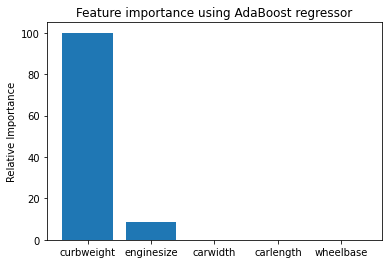

In [8]:
# Plot the bar graph
plt.figure()
plt.bar(pos, feature_importances[index_sorted], align='center')
plt.xticks(pos, df.columns[index_sorted])
plt.ylabel('Relative Importance')
plt.title('Feature importance using AdaBoost regressor')
plt.show()

In [6]:
def visualize_classifier(classifier, X, y, title=''):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Specify the title
    plt.title(title)

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

In [7]:
# Load input data
input_file = 'data_imbalance.txt'

data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Separate input data into two classes based on labels
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

# Split data into training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# Extremely Random Forests classifier
params_imbalanced = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
params_balanced = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0, 'class_weight': 'balanced'}


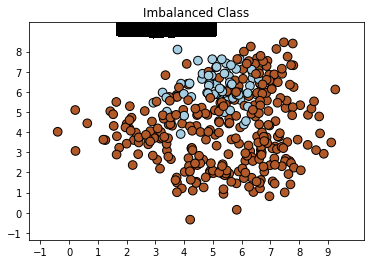

In [8]:
classifier = ExtraTreesClassifier(**params_imbalanced)
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Imbalanced Class')

In [9]:
class_names = ['Class-0', 'Class-1']
print("\nClassifier performance on dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))


Classifier performance on dataset

              precision    recall  f1-score   support

     Class-0       0.00      0.00      0.00        69
     Class-1       0.82      1.00      0.90       306

    accuracy                           0.82       375
   macro avg       0.41      0.50      0.45       375
weighted avg       0.67      0.82      0.73       375



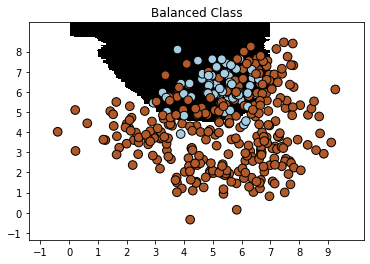

In [10]:
classifier = ExtraTreesClassifier(**params_balanced)
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Balanced Class')

In [11]:
class_names = ['Class-0', 'Class-1']
print("\nClassifier performance on dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))


Classifier performance on dataset

              precision    recall  f1-score   support

     Class-0       0.45      0.94      0.61        69
     Class-1       0.98      0.74      0.84       306

    accuracy                           0.78       375
   macro avg       0.72      0.84      0.73       375
weighted avg       0.88      0.78      0.80       375

